In [1]:
import os     
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import Activation,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
tf.__version__

'2.3.0'

In [2]:
classes = ["A", "B", "C"]

In [3]:
idg=ImageDataGenerator(rescale=1./255,dtype = ('float32'),
                                   rotation_range=40,        #隨機旋轉0~40度
                                   width_shift_range=0.4,    #隨機水平偏移的幅度  參數0~1之間  隨機偏移距離0~圖片長*參數
                                   height_shift_range=0.4,   #隨機垂直偏移的幅度  參數0~1之間  隨機偏移距離0~圖片寬*參數
                                   shear_range=0.4,         #按比例平移
                                    fill_mode='nearest',
                                   validation_split=0.2,
                                   zoom_range=0.4,          #隨機縮放的幅度 參數0~1放大   大於1變小
                                   horizontal_flip=True)
idg2=ImageDataGenerator(rescale=1./255)

In [4]:
train_directory=idg.flow_from_directory(
    directory=os.path.join("./train"),
    target_size=(224, 224),
    classes=classes,
    batch_size=20,
    class_mode='categorical',
    subset='training')

Found 2055 images belonging to 3 classes.


In [5]:
validation_directory=idg.flow_from_directory(
    directory=os.path.join("./train"),
    target_size=(224, 224),
    classes=classes,
    batch_size=20,
    class_mode='categorical',
    subset='validation')

Found 511 images belonging to 3 classes.


In [6]:
model = Sequential()

model.add(Conv2D(filters=16,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(224,224,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(224,224,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dropout (Dropout)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                8

2022-01-13 00:59:42.792657: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-13 00:59:42.808662: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fcd8c7fd250 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-13 00:59:42.808673: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [7]:
adamm=Adam(lr=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=adamm,metrics=['accuracy']) 

In [8]:
stop=EarlyStopping(monitor='val_loss', patience=5,verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    './model/',
    monitor='val_loss',
    save_best_only=True,
    verbose=0 ) 

In [9]:
fit_history=model.fit_generator(train_directory,
                                steps_per_epoch=5,
                                epochs=10,
                                validation_data=validation_directory,
                                validation_steps=5,
                                callbacks=[stop,checkpoint]) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 0.9938 - accuracy: 0.3900WARNING:tensorflow:From /Users/taeyeon/Library/Python/3.8/lib/python/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


2022-01-13 00:59:46.353594: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./model/assets
5/5 [==============================] - 3s 571ms/step - loss: 0.9938 - accuracy: 0.3900 - val_loss: 0.6420 - val_accuracy: 0.2600
Epoch 2/10
5/5 [==============================] - 3s 561ms/step - loss: 0.6099 - accuracy: 0.3900 - val_loss: 0.5990 - val_accuracy: 0.4200
Epoch 3/10
5/5 [==============================] - 2s 418ms/step - loss: 0.5842 - accuracy: 0.4300 - val_loss: 0.6386 - val_accuracy: 0.4000
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 0.5591 - accuracy: 0.5300

/Users/taeyeon/Library/Python/3.8/lib/python/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


INFO:tensorflow:Assets written to: ./model/assets
5/5 [==============================] - 2s 497ms/step - loss: 0.5591 - accuracy: 0.5300 - val_loss: 0.5156 - val_accuracy: 0.5300
Epoch 5/10
5/5 [==============================] - 3s 544ms/step - loss: 0.5645 - accuracy: 0.6000 - val_loss: 0.5110 - val_accuracy: 0.6000
Epoch 6/10
5/5 [==============================] - 2s 413ms/step - loss: 0.5350 - accuracy: 0.6300 - val_loss: 0.5463 - val_accuracy: 0.5400
Epoch 7/10
5/5 [==============================] - 3s 524ms/step - loss: 0.5206 - accuracy: 0.6100 - val_loss: 0.4897 - val_accuracy: 0.6100
Epoch 8/10
5/5 [==============================] - 2s 427ms/step - loss: 0.5828 - accuracy: 0.5400 - val_loss: 0.5241 - val_accuracy: 0.6700
Epoch 9/10
5/5 [==============================] - 2s 387ms/step - loss: 0.5777 - accuracy: 0.5500 - val_loss: 0.5345 - val_accuracy: 0.6700
Epoch 10/10
5/5 [==============================] - 2s 388ms/step - loss: 0.5287 - accuracy: 0.6400 - val_loss: 0.5517 - v

In [10]:
model = load_model('./model/')

In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

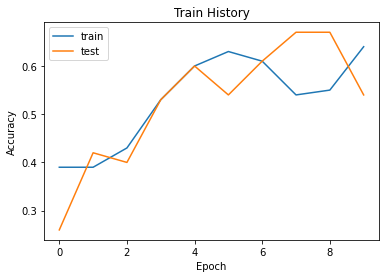

In [12]:
show_train_history(fit_history,'accuracy','val_accuracy')

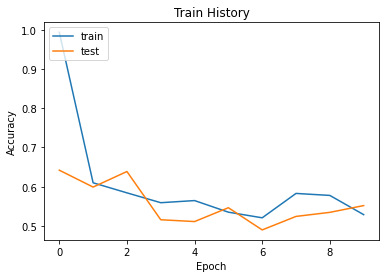

In [13]:
show_train_history(fit_history,'loss','val_loss')

In [14]:
test_path = './test/test.csv'
df = pd.read_csv(test_path, sep=',', skiprows=1,  names=['id', 'label'])
df['id'] = df['id'].astype('str')

test_datagen = ImageDataGenerator(rescale=1/255.)

test_directory = test_datagen.flow_from_dataframe(df, './test/testtest',
                                                x_col='id', y_col='label',
                                                target_size=(224,224),
                                                interpolation='bicubic',
                                                class_mode=None,
                                                shuffle=False,
                                                batch_size=1)

Found 102 validated image filenames.


In [15]:
predict = model.predict_generator(test_directory,verbose=1)
predict[:10]

Instructions for updating:
Please use Model.predict, which supports generators.
102/102 [==============================] - 0s 4ms/step


array([[0.63695884, 0.24491256, 0.11812858],
       [0.49578133, 0.19589488, 0.3083239 ],
       [0.35770547, 0.24745657, 0.39483792],
       [0.3865181 , 0.23303057, 0.38045138],
       [0.3510133 , 0.24727672, 0.40171   ],
       [0.8593711 , 0.127124  , 0.01350486],
       [0.4124334 , 0.24222901, 0.3453376 ],
       [0.39096686, 0.18824135, 0.42079183],
       [0.43547177, 0.22005375, 0.34447446],
       [0.43547177, 0.22005375, 0.34447446]], dtype=float32)

In [16]:
pred_max = np.argmax(predict, axis = 1)
print(len(pred_max))
pred_max[:10]

102


array([0, 0, 2, 0, 2, 0, 0, 2, 0, 0])

In [17]:
label_dict = {0: "A", 1: "B", 2: "C"}

In [18]:
test_label = df['label']
print(label_dict)
pd.crosstab(test_label,pred_max,
            rownames=['label'],colnames=['predict'])

{0: 'A', 1: 'B', 2: 'C'}


predict,0,2
label,,
0,28,6
1,31,3
2,14,20


In [19]:
def show_Predicted_Probability(i):
    print('label:',label_dict[test_label[i]],
          'predict:',label_dict[pred_max[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(test_directory[i],(224, 224,3)))
    plt.show()
    for j in range(2):
        print(label_dict[j]+' Probability:%1.5f'%(predict[i][j]))

label: A predict: A


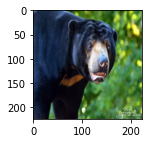

A Probability:0.63696
B Probability:0.24491


In [20]:
show_Predicted_Probability(0)

In [21]:
df = pd.DataFrame({'label':test_label, 'predict':pred_max})
df[(df.label==0)&(df.predict==1)]

,label,predict


label: A predict: A


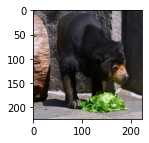

A Probability:0.52608
B Probability:0.24115


In [22]:
show_Predicted_Probability(24)